# alrighty, lets check for relationships


import libraries again



In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
sns.set_style("whitegrid")

In [2]:
london1 = pd.read_csv('london1.csv')
london1.head()

,Borough,Population,longitude,latitude,Total_Crime,Crime_Rate,Crime_Rate_binned,Arts,Outdoors,Study,Social and Religious,Total_Venues
0,Barking and Dagenham,212906,0.129506,51.5455,39456,18532.12,Medium,50,42,48,49,189
1,Barnet,395896,-0.218210,51.6111,59167,14945.09,Low,49,32,50,50,181
2,Bexley,248287,0.146212,51.4582,33929,13665.23,Low,47,40,44,48,179
3,Brent,329771,-0.275680,51.5644,59257,17969.14,Medium,49,37,50,50,186
4,Bromley,332336,0.039246,51.3727,47499,14292.46,Low,46,40,45,48,179


I want to see if there is a correlation between crime rate and:
- total venues
- arts venues
- outdoor recreation venues
- colleges and libraries
- social and religious venues

In [3]:
# use pandas .corr() to have a quick look
london1.corr()

,Population,longitude,latitude,Total_Crime,Crime_Rate,Arts,Outdoors,Study,Social and Religious,Total_Venues
Population,1.000000,0.101452,0.205335,0.462454,-0.083029,-0.028919,-0.052037,-0.093137,-0.054589,-0.078186
longitude,0.101452,1.000000,0.058903,0.023742,-0.036664,-0.427959,0.123579,-0.442457,-0.492784,-0.366596
latitude,0.205335,0.058903,1.000000,0.221116,0.150148,-0.053869,-0.479139,0.103848,0.065804,-0.173287
Total_Crime,0.462454,0.023742,0.221116,1.000000,0.836521,0.199595,-0.259456,0.239639,0.258337,0.102472
Crime_Rate,-0.083029,-0.036664,0.150148,0.836521,1.000000,0.228355,-0.281293,0.315227,0.315756,0.143139
Arts,-0.028919,-0.427959,-0.053869,0.199595,0.228355,1.000000,0.320478,0.754763,0.806918,0.942571
Outdoors,-0.052037,0.123579,-0.479139,-0.259456,-0.281293,0.320478,1.000000,-0.110410,-0.063784,0.490246
Study,-0.093137,-0.442457,0.103848,0.239639,0.315227,0.754763,-0.110410,1.000000,0.881682,0.774767
Social and Religious,-0.054589,-0.492784,0.065804,0.258337,0.315756,0.806918,-0.063784,0.881682,1.000000,0.796507
Total_Venues,-0.078186,-0.366596,-0.173287,0.102472,0.143139,0.942571,0.490246,0.774767,0.796507,1.000000


it doesn't look too encouraging, but let's plot them and see.

Text(0.5, 1.0, 'Total Venues Vs Crime Rate')

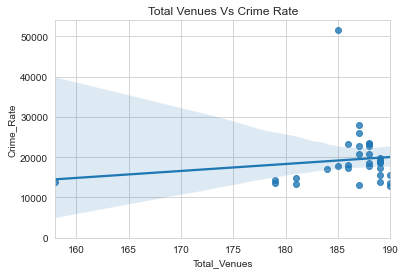

In [8]:
sns.regplot(x="Total_Venues", y="Crime_Rate", data=london1)
plt.ylim(0,)
plt.title('Total Venues Vs Crime Rate')

Text(0.5, 1.0, 'Art Venues Vs Crime Rate')

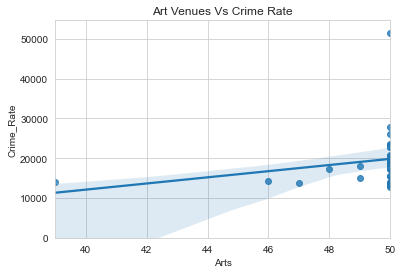

In [9]:
sns.regplot(x="Arts", y="Crime_Rate", data=london1)
plt.ylim(0,)
plt.title('Art Venues Vs Crime Rate')


Text(0.5, 1.0, 'Outdoor Recreation Venues Vs Crime Rate')

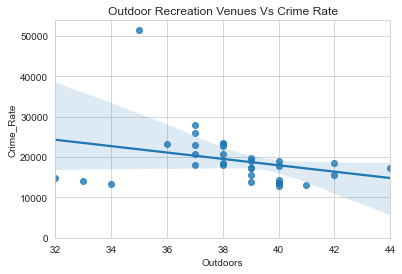

In [10]:
sns.regplot(x="Outdoors", y="Crime_Rate", data=london1)
plt.ylim(0,)
plt.title('Outdoor Recreation Venues Vs Crime Rate')

Text(0.5, 1.0, 'Study Venues Vs Crime Rate')

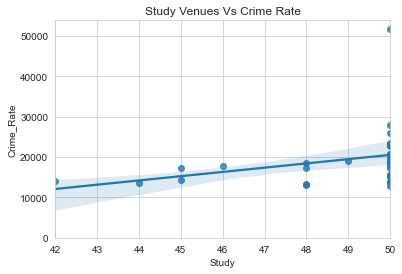

In [11]:
sns.regplot(x="Study", y="Crime_Rate", data=london1)
plt.ylim(0,)
plt.title('Study Venues Vs Crime Rate')

Text(0.5, 1.0, 'Social and Religious Venues Vs Crime Rate')

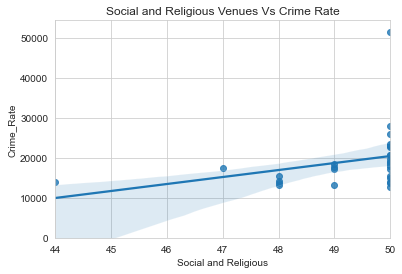

In [12]:
sns.regplot(x="Social and Religious", y="Crime_Rate", data=london1)
plt.ylim(0,)
plt.title('Social and Religious Venues Vs Crime Rate')


not really looking great, but let's calculate the Pearson Correlation just to be certain.

In [24]:
def calc_pearson(var):
    pearson_coef, p_value = scipy.stats.pearsonr(london1[var], london1['Crime_Rate'])
    print(f'The correlation coefficient for {var} with crime rate is {round(pearson_coef, 3)}, with a p-value of {round(p_value, 3)}')
    if p_value < 0.05:
        print('The correlation is statistically significant.')
    else:
        print('The correlation is not statistically significant.')

cols = ['Arts', 'Outdoors', 'Study', 'Social and Religious']
for col in cols:
    calc_pearson(col)

The correlation coefficient for Arts with crime rate is 0.228, with a p-value of 0.209
The correlation is not statistically significant.
The correlation coefficient for Outdoors with crime rate is -0.281, with a p-value of 0.119
The correlation is not statistically significant.
The correlation coefficient for Study with crime rate is 0.315, with a p-value of 0.079
The correlation is not statistically significant.
The correlation coefficient for Social and Religious with crime rate is 0.316, with a p-value of 0.078
The correlation is not statistically significant.


Pearson Correlations are strongest, when they are near to 1 or -1.
None of these are close to one, so no correlation is strong.

And with a significance value of p < 0.05, none of the correlations are statistically significant.

So we can state, there is no correlation between number of venues, or venue types and crime rates.

Analysed this way, anyway.

What if we used k-means to cluster the venues, and then looked again?


In [25]:
london2 = pd.read_csv('london2.csv')
london2.head()

,Borough,Population,longitude,latitude,Total_Crime,Crime_Rate,Crime_Rate_binned,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,212906,0.129506,51.5455,39456,18532.12,Medium,2,Church,Park,Community Center,Library,Art Gallery,College Academic Building,General College & University,Historic Site,College Classroom,University
1,Barnet,395896,-0.218210,51.6111,59167,14945.09,Low,1,Church,Park,Library,University,History Museum,College Academic Building,Historic Site,College Residence Hall,General College & University,Pub
2,Bexley,248287,0.146212,51.4582,33929,13665.23,Low,2,Church,Park,Library,Historic Site,College Academic Building,Community Center,College Classroom,Gym / Fitness Center,Social Club,University
3,Brent,329771,-0.275680,51.5644,59257,17969.14,Medium,1,Church,Park,Library,University,Art Gallery,College Academic Building,Historic Site,Soccer Stadium,Bridge,Social Club
4,Bromley,332336,0.039246,51.3727,47499,14292.46,Low,3,Church,Park,Library,Community College,Gym / Fitness Center,College Academic Building,Historic Site,Art Gallery,General Entertainment,General College & University


first, lets look at the clusters

the 1st 2 most common venues for ALL london boroughs are:
Church
Park

### Cluster 1
3rd is University, 4th is Library
Then there are a lot of museums and historic sites
so I will call cluster 1

### Historic London

In [27]:
london2.loc[london2['Cluster Labels'] == 0, london2.columns[[0] + list(range(8, london2.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Camden,Church,Park,University,Library,Historic Site,Art Museum,History Museum,Social Club,Plaza,College Academic Building
10,Hackney,Church,Park,University,Library,Social Club,Art Museum,Plaza,History Museum,College Academic Building,Historic Site
11,Hammersmith and Fulham,Church,Park,University,Library,Art Museum,College Academic Building,Plaza,Historic Site,Social Club,History Museum
12,Haringey,Church,Park,University,Library,College Academic Building,Plaza,History Museum,Art Museum,Palace,Social Club
17,Islington,Church,Park,University,Library,Social Club,Art Museum,General College & University,History Museum,Plaza,College Academic Building
18,Kensington and Chelsea,Church,Park,University,Library,Art Museum,Historic Site,History Museum,Social Club,College Academic Building,Plaza
20,Lambeth,Church,Park,University,Library,Social Club,Art Museum,Historic Site,College Academic Building,History Museum,Theater
21,Lewisham,Church,Park,University,Library,Plaza,Theater,Community Center,Historic Site,Social Club,Bridge
23,Newham,Church,Park,University,Library,Plaza,Theater,Bridge,History Museum,Social Club,Community Center
26,Southwark,Church,Park,University,Library,Social Club,Art Museum,Historic Site,Plaza,College Academic Building,History Museum


### Cluster 2
Seems to be slightly less scholarly than cluster 1. Has colleges and universities, and libraries. Fewer museums.
I will call cluster 2
### Student London

In [28]:
london2.loc[london2['Cluster Labels'] == 1, london2.columns[[0] + list(range(8, london2.shape[1]))]]


,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Barnet,Church,Park,Library,University,History Museum,College Academic Building,Historic Site,College Residence Hall,General College & University,Pub
3,Brent,Church,Park,Library,University,Art Gallery,College Academic Building,Historic Site,Soccer Stadium,Bridge,Social Club
7,Ealing,Church,Park,College Academic Building,Library,Historic Site,Art Gallery,General College & University,Bridge,Soccer Stadium,Outdoor Sculpture
15,Hillingdon,Church,Park,Library,College Academic Building,Gym / Fitness Center,College Library,University,General College & University,College Residence Hall,Mosque
16,Hounslow,Church,Park,Historic Site,Library,College Academic Building,University,General College & University,General Entertainment,Bridge,Outdoor Sculpture
19,Kingston upon Thames,Church,Park,Library,College Academic Building,Historic Site,University,Bridge,General College & University,Outdoor Sculpture,Soccer Stadium
22,Merton,Church,Park,Library,Plaza,College Academic Building,University,Theater,Art Museum,Historic Site,Bridge
25,Richmond upon Thames,Church,Park,College Academic Building,Library,Historic Site,Art Gallery,Bridge,University,College Classroom,General College & University


### Cluster 3
This one has fewer colleges and more art galleries and music venues.
I will call cluster 3
### Arty London

In [31]:
london2.loc[london2['Cluster Labels'] == 2, london2.columns[[0] + list(range(8, london2.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,Church,Park,Community Center,Library,Art Gallery,College Academic Building,General College & University,Historic Site,College Classroom,University
2,Bexley,Church,Park,Library,Historic Site,College Academic Building,Community Center,College Classroom,Gym / Fitness Center,Social Club,University
8,Enfield,Church,Park,Library,General College & University,College Academic Building,Community Center,Art Gallery,Pub,History Museum,Cricket Ground
9,Greenwich,Church,Park,Library,University,College Academic Building,Art Gallery,Historic Site,Community Center,General College & University,Social Club
13,Harrow,Church,Park,Library,College Academic Building,Movie Theater,Music Venue,General College & University,University,Historic Site,Community Center
14,Havering,Church,Park,Library,College Academic Building,Social Club,College Classroom,Community Center,Music Venue,General Entertainment,General College & University
24,Redbridge,Church,Park,Library,Community Center,Art Gallery,College Academic Building,General College & University,Pub,Gym / Fitness Center,Social Club
29,Waltham Forest,Church,Park,Library,Art Gallery,University,History Museum,Social Club,General College & University,Historic Site,College Residence Hall


### Cluster 4
The smallest cluster, with several general entertainment venues, so i will call it
### Entertainment London

In [33]:
london2.loc[london2['Cluster Labels'] == 3, london2.columns[[0] + list(range(8, london2.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Bromley,Church,Park,Library,Community College,Gym / Fitness Center,College Academic Building,Historic Site,Art Gallery,General Entertainment,General College & University
6,Croydon,Church,Park,Library,Community College,Historic Site,Student Center,Art Gallery,General Entertainment,Pub,College Academic Building
27,Sutton,Church,Park,Library,College Academic Building,Performing Arts Venue,Historic Site,General College & University,General Entertainment,University,Movie Theater


In [34]:
labels = {0: "Historic London", 1: "Student London", 2: "Arty London", 3: 'Entertainment London'}

london2['Cluster Names'] = london2['Cluster Labels'].map(labels)
london2.head()

,Borough,Population,longitude,latitude,Total_Crime,Crime_Rate,Crime_Rate_binned,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,212906,0.129506,51.5455,39456,18532.12,Medium,Arty London,Church,Park,Community Center,Library,Art Gallery,College Academic Building,General College & University,Historic Site,College Classroom,University
1,Barnet,395896,-0.218210,51.6111,59167,14945.09,Low,Student London,Church,Park,Library,University,History Museum,College Academic Building,Historic Site,College Residence Hall,General College & University,Pub
2,Bexley,248287,0.146212,51.4582,33929,13665.23,Low,Arty London,Church,Park,Library,Historic Site,College Academic Building,Community Center,College Classroom,Gym / Fitness Center,Social Club,University
3,Brent,329771,-0.275680,51.5644,59257,17969.14,Medium,Student London,Church,Park,Library,University,Art Gallery,College Academic Building,Historic Site,Soccer Stadium,Bridge,Social Club
4,Bromley,332336,0.039246,51.3727,47499,14292.46,Low,Entertainment London,Church,Park,Library,Community College,Gym / Fitness Center,College Academic Building,Historic Site,Art Gallery,General Entertainment,General College & University


This time I will map the crime rates in London and overlay the clusters, to see if there is a pattern

